In [ ]:
# encoding=utf8

# Linear Regression Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.formula.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [2]:
%matplotlib inline

In [3]:
data_regression = pd.read_csv('../../DataSets/pybk016master/Ex02_TreeData_Regreesion.csv')

## Selecting the Best Model - Feature Selection

### 1. Scatter Plot 

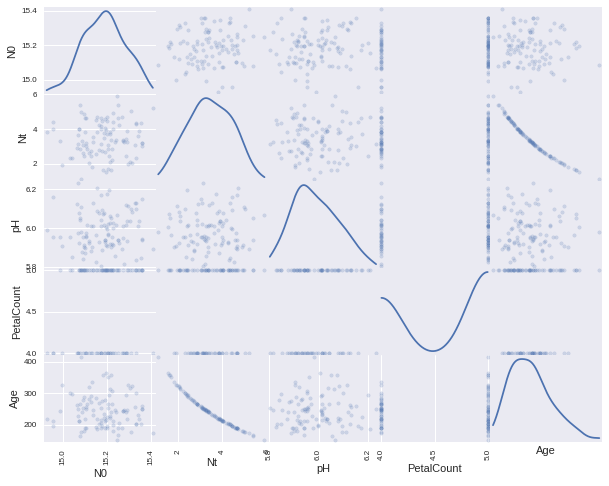

In [4]:
scatter_matrix(data_regression, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
# Computing the correlation matrix
Correlation_data = data_regression.corr()
Correlation_data

,N0,Nt,pH,PetalCount,Age
N0,1.000000,0.080825,0.053488,0.127779,-0.058794
Nt,0.080825,1.000000,0.003821,-0.003614,-0.980478
pH,0.053488,0.003821,1.000000,0.099505,0.007455
PetalCount,0.127779,-0.003614,0.099505,1.000000,0.053744
Age,-0.058794,-0.980478,0.007455,0.053744,1.000000


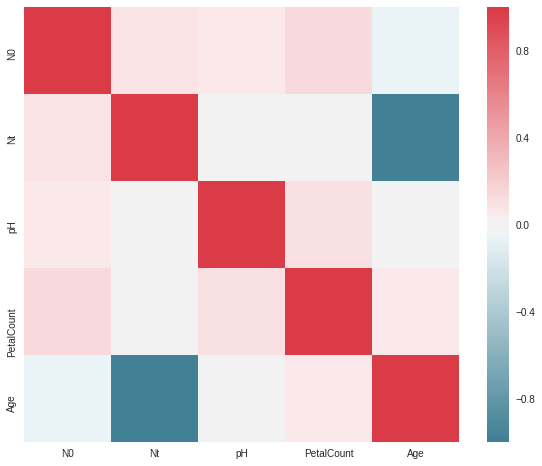

In [6]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(Correlation_data, mask=np.zeros_like(Correlation_data, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [7]:
# init a Linear Regression Model
Linear_Model = LinearRegression()

###### Method 1 - Linear Regression Model

In [8]:
X = data_regression.drop(['Age'], axis=1)
Y = data_regression.Age

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4, train_size=.80, test_size=.20)
Linear_Model.fit(X_train, Y_train)
print("Intercept = ", Linear_Model.intercept_)
print("Coefficeints = ", Linear_Model.coef_)


Intercept =  240.181478256
Coefficeints =  [  9.23884541 -49.90688136   2.5332047    4.51793938]


##### Residuals

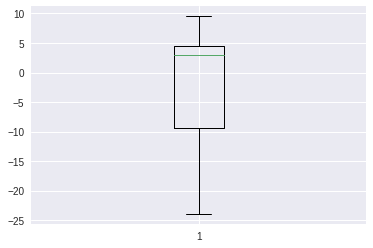

In [9]:
Residuals_allFeatures = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_allFeatures)
plt.show()

In [10]:
model_ALL = sm.ols(formula="Age ~ N0 + Nt + pH + PetalCount", data = data_regression[:80]).fit()
print(model_ALL.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     486.2
Date:                Fri, 31 Mar 2017   Prob (F-statistic):           8.60e-53
Time:                        18:50:07   Log-Likelihood:                -295.87
No. Observations:                  80   AIC:                             601.7
Df Residuals:                      75   BIC:                             613.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    355.1804    183.537      1.935      0.0

A look at the corelation m atrix of Nt vs Age depicts an exponential relation.

## Taking the log of 'Nt' Feature

In [11]:
model_logNT = sm.ols(formula= "Age ~ np.log(Nt)", data = data_regression[:80]).fit()
print(model_logNT.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.732e+05
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          2.70e-132
Time:                        18:50:07   Log-Likelihood:                -119.35
No. Observations:                  80   AIC:                             242.7
Df Residuals:                      78   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.7923      0.486    895.331      0.0

In [12]:
Predict_logNT = model_logNT.predict(X_test)

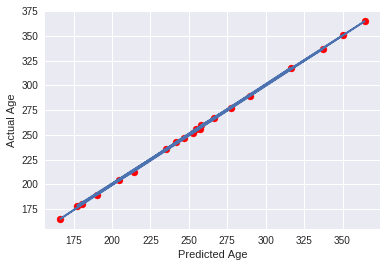

In [13]:
plt.scatter(Predict_logNT, Y_test, color = 'r')
plt.plot(Predict_logNT, Y_test)
plt.xlabel("Predicted Age")
plt.ylabel("Actual Age")
plt.show()

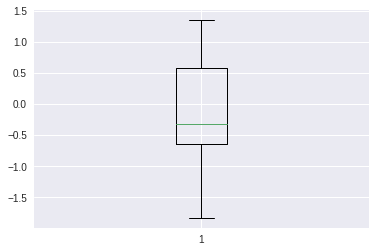

In [14]:
Residuals_NTOnly = np.array(Predict_logNT - Y_test)
plt.boxplot(Residuals_NTOnly)
plt.show()

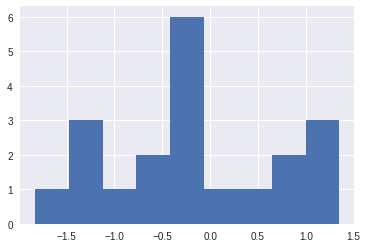

In [15]:
plt.hist(Residuals_NTOnly, bins=9)
plt.show()

## Hypothesis Tesing

In [16]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_logNT.resid, model_logNT.model.exog)
list(zip(name,test))

[('F statistics', 0.95042963795290225), ('p_value', 0.56185231271457259)]

## Ridge Regression

In [17]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
%matplotlib inline

/home/user/assign2/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [19]:
# Applying Ridge Model Fit with no specific value of alpha
ridge = Ridge(normalize=True)

coefs = [] 

# Fitting X and Y for each value of alpha using a loop statment
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

In [20]:
coefs_df = pd.DataFrame(coefs, columns=X.columns.values)
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df.head()

,N0,Nt,pH,PetalCount,Alpha
0,-6.022439e-09,-1.000878e-08,7.931866e-10,1.108602e-09,5.000000e+09
1,-7.961310e-09,-1.323101e-08,1.048546e-09,1.465506e-09,3.782317e+09
2,-1.052438e-08,-1.749062e-08,1.386116e-09,1.937313e-09,2.861184e+09
3,-1.391262e-08,-2.312157e-08,1.832364e-09,2.561014e-09,2.164381e+09
4,-1.839166e-08,-3.056536e-08,2.422277e-09,3.385509e-09,1.637275e+09


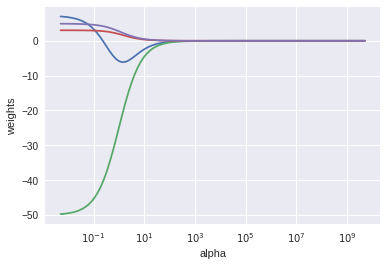

In [21]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [22]:
from plotly.offline import plot  
import plotly.plotly as py
import plotly.graph_objs as go

coef_df = coefs_df.iloc[:,:4]
labels = coefs_df.columns.values


colors = ['c','r','y','g']
line_size = [1,1,1,1]

traces = []

for i in range(0, len(coefs_df.columns)-1):
    traces.append(go.Scatter(
        x = coefs_df[labels[i]],
        y = coefs_df.Alpha,
        name = labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,       
    ))
    
    
layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=traces, layout=layout)
plot(fig)

'file:///home/user/assign2/Regression-Analysis/temp-plot.html'

### Data split

In [23]:
# Use the cross-validation package to split data into training and test sets
data_x_train, data_x_test , data_y_train, data_y_test = cross_validation.train_test_split(X,Y, test_size=0.5, random_state=1)

In [24]:
ridge2 = Ridge(alpha=10, normalize=True)
ridge2.fit(data_x_train, data_y_train)
pred2 = ridge2.predict(data_x_test)
print(pd.Series(ridge2.coef_, index=X.columns))
print(mean_squared_error(data_y_test, pred2))

N0           -2.006325
Nt           -4.491225
pH            3.405050
PetalCount    0.978187
dtype: float64
1747.28367063


### Using cross validation for the value of alpha

In [25]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(data_x_train, data_y_train)
ridgecv.alpha_

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was 

0.0050000000000000001

In [26]:
ridge3 = Ridge(alpha= ridgecv.alpha_, normalize=True)
ridge3.fit(data_x_train, data_y_train)
pred3 = ridge3.predict(data_x_test)
print(pd.Series(ridge3.coef_, index=X.columns))
print(mean_squared_error(data_y_test, pred3))

N0             1.949761
Nt           -49.070932
pH             4.651837
PetalCount     5.040667
dtype: float64
70.705584585


## Lasso Regression

In [27]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

In [28]:
from sklearn.preprocessing import scale
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(data_x_train), data_y_train)
    coefs.append(lasso.coef_)

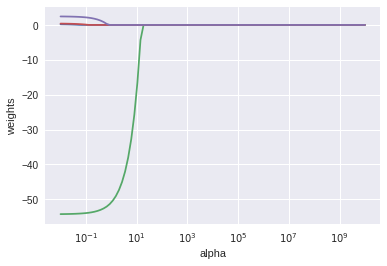

In [29]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [30]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(data_x_train, data_y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(data_x_train, data_y_train)
mean_squared_error(data_y_test, lasso.predict(data_x_test))

74.321996375668647